In [1]:
import anndata as an
import scanpy as sc
import scarches as sca
import numpy as np
import gdown

/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)
/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWarning: Importing CSCDataset from `anndata.experimental` is deprecated. Import anndata.abc.CSCDataset instead.
  warnings.warn(msg, FutureWarning)
/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/utils.py:429: FutureWar

In [2]:
adata = an.read_h5ad("dataset/hiPSC.h5ad") 

/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/compat/__init__.py:358: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [3]:
adata.X = adata.X.astype(np.float32)

In [ ]:
url = 'https://drive.google.com/uc?id=1136LntaVr92G1MphGeMVcmpE0AqcqM6c'
output = 'reactome.gmt'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1136LntaVr92G1MphGeMVcmpE0AqcqM6c
To: /home/luna/Desktop/in-house/reactome.gmt
100%|██████████| 331k/331k [00:00<00:00, 6.14MB/s]


'reactome.gmt'

In [5]:
sca.utils.add_annotations(adata, 'reactome.gmt', min_genes=12, clean=True)
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [6]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [7]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,run,sample_name,percent.mt,percent.dissoc,RNA_snn_res.0.3,seurat_clusters,RNA_snn_res.0.22
batch_2_A_AAACCCAAGGTAATCA-1,SeuratProject,48806.0,6892,0h_A,iPSC_99_4,5.110027,0.013308,2,0,0
batch_2_A_AAAGGATCATCCAATG-1,SeuratProject,5460.0,2307,0h_A,iPSC_99_4,0.201465,0.015073,7,0,0
batch_2_A_AAAGGATGTGGTCAAG-1,SeuratProject,32899.0,5707,0h_A,iPSC_99_4,4.097389,0.014101,2,0,0
batch_2_A_AAAGGTAGTGTCATCA-1,SeuratProject,37327.0,6069,0h_A,iPSC_99_4,4.532912,0.013420,2,0,0
batch_2_A_AAATGGACATATCTGG-1,SeuratProject,18633.0,4701,0h_A,iPSC_99_4,4.932110,0.013176,2,0,0
...,...,...,...,...,...,...,...,...,...,...
batch_1_sample_120H_TTTACTGCATCCGCGA-1,SeuratProject,14013.0,4629,120h,iPSC_72_1,4.767002,0.017398,3,2,2
batch_1_sample_120H_TTTCACATCAGCCCAG-1,SeuratProject,21173.0,5140,120h,iPSC_72_1,4.127899,0.014142,5,4,4
batch_1_sample_120H_TTTCAGTAGTACAGAT-1,SeuratProject,22107.0,5437,120h,iPSC_72_1,2.035554,0.013721,3,2,2
batch_1_sample_120H_TTTGATCAGCTCCATA-1,SeuratProject,12806.0,4127,120h,iPSC_72_1,3.428081,0.015297,3,2,2


In [8]:
sc.pp.highly_variable_genes(
    adata,
    n_top_genes=2000,
    subset=True)

In [9]:
select_terms = adata.varm['I'].sum(0)>12
adata.uns['terms'] = np.array(adata.uns['terms'])[select_terms].tolist()
adata.varm['I'] = adata.varm['I'][:, select_terms]

In [10]:
adata._inplace_subset_var(adata.varm['I'].sum(1)>0)

In [11]:
intr_cvae = sca.models.EXPIMAP(
    adata=adata,
    condition_key='sample_name',
    hidden_layer_sizes=[256, 256, 256],
    recon_loss='nb'
)



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1956 256 4
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 234
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  234 0 0 4 1956
	with hard mask.
Last Decoder layer: softmax


In [12]:
ALPHA = 0.7

In [13]:
early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss", # val_unweighted_loss
    "threshold": 0,
    "patience": 50,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}
intr_cvae.train(
    n_epochs=400,
    alpha_epoch_anneal=100,
    alpha=ALPHA,
    alpha_kl=0.5,
    weight_decay=0.,
    early_stoppinstudyg_kwargs=early_stopping_kwargs,
    use_early_stopstudyping=True,
    monitor_only_val=False,
    seed=2020,
)



Preparing (4694, 1956)
Instantiating dataset
Init the group lasso proximal operator for the main terms.
 |█████████████████---| 86.8%  - epoch_loss: 1109.6533885283 - epoch_recon_loss: 1097.4098582548 - epoch_kl_loss: 24.4870402392 - val_loss: 1237.5632629395 - val_recon_loss: 1221.3123168945 - val_kl_loss: 32.5019521713106
ADJUSTED LR
 |███████████████████-| 97.2%  - epoch_loss: 1107.2241067325 - epoch_recon_loss: 1095.0904397403 - epoch_kl_loss: 24.2673155841 - val_loss: 1235.9753112793 - val_recon_loss: 1219.5605163574 - val_kl_loss: 32.8296060562
ADJUSTED LR
 |███████████████████-| 99.0%  - epoch_loss: 1109.0636237649 - epoch_recon_loss: 1096.8334566004 - epoch_kl_loss: 24.4603342729 - val_loss: 1235.8184814453 - val_recon_loss: 1219.4380187988 - val_kl_loss: 32.7608551979
Stopping early: no improvement of more than 0 nats in 20 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state of network...


In [14]:
MEAN = False

In [15]:
adata.obsm['X_cvae'] = intr_cvae.get_latent(mean=MEAN, only_active=True)
sc.pp.neighbors(adata, use_rep='X_cvae')
sc.tl.umap(adata)


In [16]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,run,sample_name,percent.mt,percent.dissoc,RNA_snn_res.0.3,seurat_clusters,RNA_snn_res.0.22
batch_2_A_AAACCCAAGGTAATCA-1,SeuratProject,48806.0,6892,0h_A,iPSC_99_4,5.110027,0.013308,2,0,0
batch_2_A_AAAGGATCATCCAATG-1,SeuratProject,5460.0,2307,0h_A,iPSC_99_4,0.201465,0.015073,7,0,0
batch_2_A_AAAGGATGTGGTCAAG-1,SeuratProject,32899.0,5707,0h_A,iPSC_99_4,4.097389,0.014101,2,0,0
batch_2_A_AAAGGTAGTGTCATCA-1,SeuratProject,37327.0,6069,0h_A,iPSC_99_4,4.532912,0.013420,2,0,0
batch_2_A_AAATGGACATATCTGG-1,SeuratProject,18633.0,4701,0h_A,iPSC_99_4,4.932110,0.013176,2,0,0
...,...,...,...,...,...,...,...,...,...,...
batch_1_sample_120H_TTTACTGCATCCGCGA-1,SeuratProject,14013.0,4629,120h,iPSC_72_1,4.767002,0.017398,3,2,2
batch_1_sample_120H_TTTCACATCAGCCCAG-1,SeuratProject,21173.0,5140,120h,iPSC_72_1,4.127899,0.014142,5,4,4
batch_1_sample_120H_TTTCAGTAGTACAGAT-1,SeuratProject,22107.0,5437,120h,iPSC_72_1,2.035554,0.013721,3,2,2
batch_1_sample_120H_TTTGATCAGCTCCATA-1,SeuratProject,12806.0,4127,120h,iPSC_72_1,3.428081,0.015297,3,2,2


In [17]:
sc.pl.umap(adata, color=['Characteristics.inferred.cell.type...authors.labels.',"Characteristics.sampling.site."], frameon=False)

KeyError: 'Characteristics.inferred.cell.type...authors.labels.'

<Figure size 1932x800 with 0 Axes>

In [18]:

hips = sc.read('dataset/tyser.h5ad')

In [19]:
common_var_names = adata.var_names.intersection(hips.var_names)
hips = hips[:, common_var_names].copy()

In [20]:
q_intr_cvae = sca.models.EXPIMAP.load_query_data(hips, intr_cvae)

Query data is missing expression data of  7  genes which were contained in the reference dataset.
The missing information will be filled with zeroes.
AnnData object with n_obs × n_vars = 1069 × 1956
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'run', 'sample_name', 'timepoint', 'percent.mt'


/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 1956 256 5
	Hidden Layer 1 in/out: 256 256
	Hidden Layer 2 in/out: 256 256
	Mean/Var Layer in/out: 256 234
Decoder Architecture:
	Masked linear layer in, ext_m, ext, cond, out:  234 0 0 5 1956
	with hard mask.
Last Decoder layer: softmax


In [21]:
#q_intr_cvae = sca.models.EXPIMAP.load("hips_tips_querry",adata)

In [22]:
q_intr_cvae.train(n_epochs=400, alpha_epoch_anneal=100, weight_decay=0., alpha_kl=0.1, seed=2020, use_early_stopping=True)

Preparing (1069, 1956)
Instantiating dataset
 |████████████████████| 100.0%  - val_loss: 4425.7910156250 - val_recon_loss: 4423.9223632812 - val_kl_loss: 18.6851596832
Saving best state of network...
Best State was in Epoch 399


In [23]:
q_intr_cvae.save('hips_tips_querry_2')

In [24]:
kang_pbmc = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')

/tmp/ipykernel_51149/3446286259.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  kang_pbmc = sc.AnnData.concatenate(adata, hips, batch_key='batch_join', uns_merge='same')


In [25]:
kang_pbmc

AnnData object with n_obs × n_vars = 5763 × 1949
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'run', 'sample_name', 'percent.mt', 'percent.dissoc', 'RNA_snn_res.0.3', 'seurat_clusters', 'RNA_snn_res.0.22', 'Source.Name', 'Characteristics.sampling.site.', 'Characteristics.inferred.cell.type...authors.labels.', 'Characteristics.inferred.cell.type...ontology.labels.', 'cluster_id', 'sub_cluster', 'origin', 'timepoint', 'batch_join'
    var: 'features', 'highly_variable-0', 'means-0', 'dispersions-0', 'dispersions_norm-0'

In [26]:
sc.pp.neighbors(kang_pbmc)
sc.tl.umap(kang_pbmc)

/home/luna/Desktop/in-house/.venv/lib/python3.12/site-packages/scanpy/tools/_utils.py:41: UserWarning: You’re trying to run this on 1949 dimensions of `.X`, if you really want this, set `use_rep='X'`.
         Falling back to preprocessing with `sc.pp.pca` and default params.
  warnings.warn(


In [27]:
kang_pbmc.obs

,orig.ident,nCount_RNA,nFeature_RNA,run,sample_name,percent.mt,percent.dissoc,RNA_snn_res.0.3,seurat_clusters,RNA_snn_res.0.22,Source.Name,Characteristics.sampling.site.,Characteristics.inferred.cell.type...authors.labels.,Characteristics.inferred.cell.type...ontology.labels.,cluster_id,sub_cluster,origin,timepoint,batch_join
batch_2_A_AAACCCAAGGTAATCA-1-0,SeuratProject,48806.000000,6892,0h_A,iPSC_99_4,5.110027,0.013308,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
batch_2_A_AAAGGATCATCCAATG-1-0,SeuratProject,5460.000000,2307,0h_A,iPSC_99_4,0.201465,0.015073,7,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
batch_2_A_AAAGGATGTGGTCAAG-1-0,SeuratProject,32899.000000,5707,0h_A,iPSC_99_4,4.097389,0.014101,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
batch_2_A_AAAGGTAGTGTCATCA-1-0,SeuratProject,37327.000000,6069,0h_A,iPSC_99_4,4.532912,0.013420,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
batch_2_A_AAATGGACATATCTGG-1-0,SeuratProject,18633.000000,4701,0h_A,iPSC_99_4,4.932110,0.013176,2,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS.sc7785965-1,0,226569.027995,6361,tyser,tyser,1.675409,NaN,NaN,NaN,NaN,SS.sc7785965,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,1
SS.sc7788259-1,0,353921.980998,4647,tyser,tyser,1.615045,NaN,NaN,NaN,NaN,SS.sc7788259,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,1
SS.sc7786123-1,0,366998.009999,2822,tyser,tyser,1.602395,NaN,NaN,NaN,NaN,SS.sc7786123,caudal,primitive streak,primitive streak cell,Primitive Streak,Primitive Streak,tyser,tyser,1
SS.sc7786212-1,0,459601.642974,6110,tyser,tyser,1.150624,NaN,NaN,NaN,NaN,SS.sc7786212,caudal,epiblast cell,epiblast cell,Epiblast,Epiblast,tyser,tyser,1


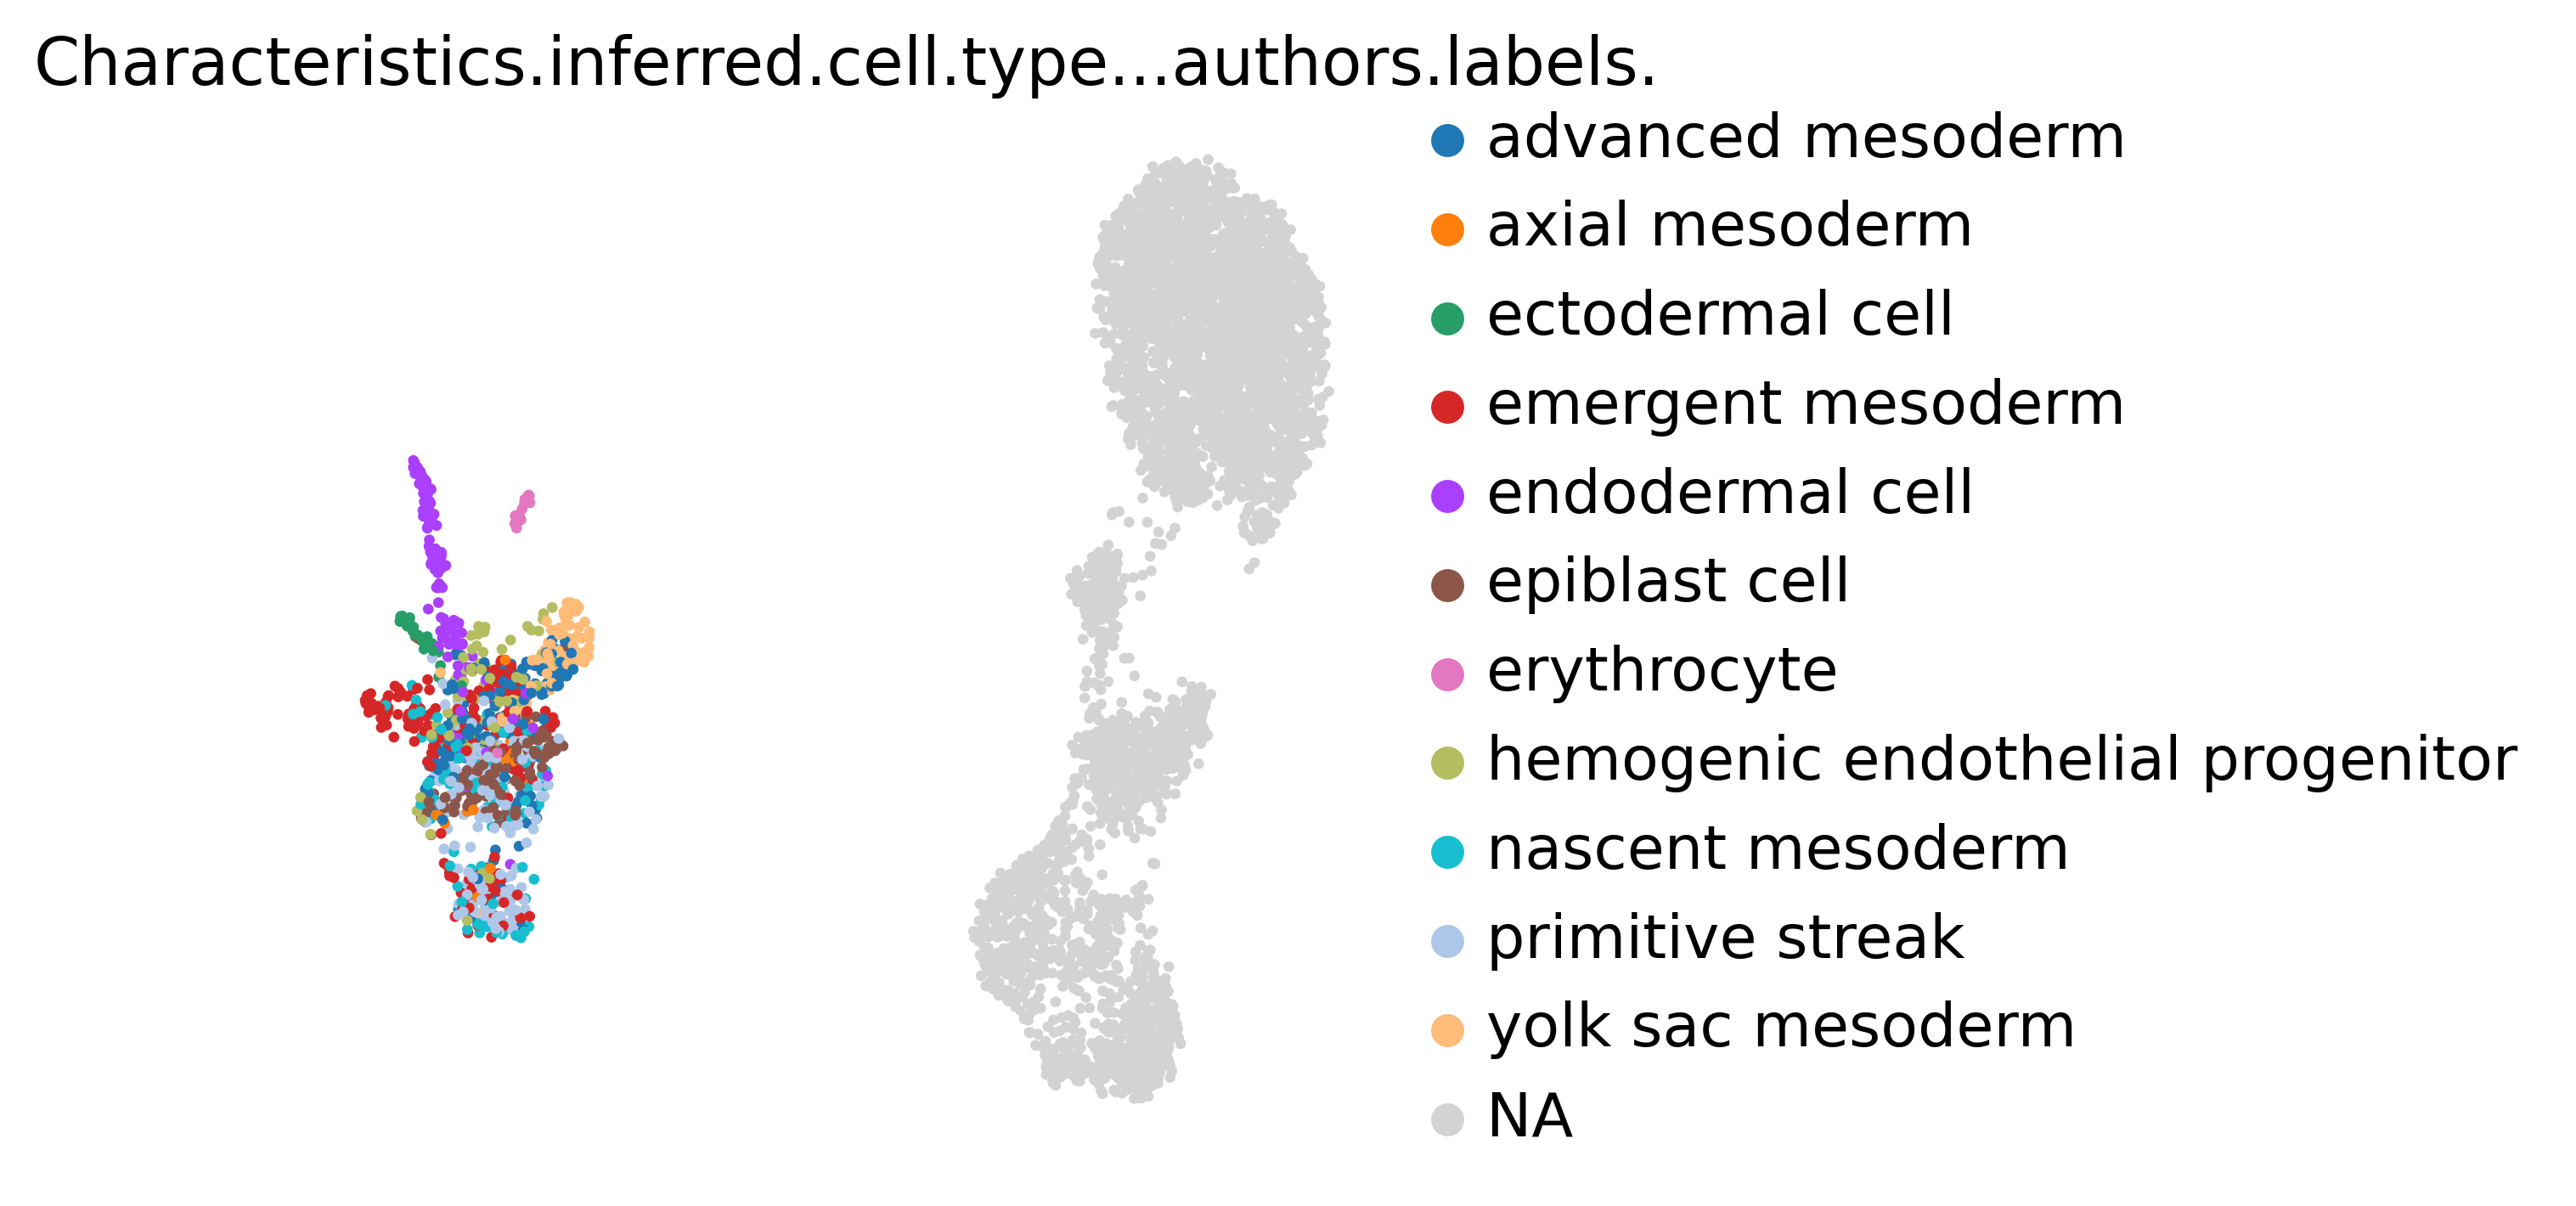

In [30]:
sc.pl.umap(kang_pbmc, color=['Characteristics.inferred.cell.type...authors.labels.'], frameon=False, wspace=0.6)